In [8]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [7]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.dates as mdates

# Reflect Tables into SQLAlchemy ORM

In [9]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, distinct, inspect
from flask import Flask, jsonify

In [10]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [11]:
# reflect an existing database into a new model ie # Declare a Base using `automap_base()`
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [12]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [13]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [14]:
# Create our session (link) from Python to the DB
session = Session(engine)
conn = engine.connect()

# Exploratory Precipitation Analysis

In [ ]:
# Find the most recent date in the data set.

In [31]:
engine.execute('SELECT * FROM Measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [32]:
engine.execute('SELECT * FROM Station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

('2017-08-23',)
2016-08-23


<Figure size 1296x1152 with 0 Axes>

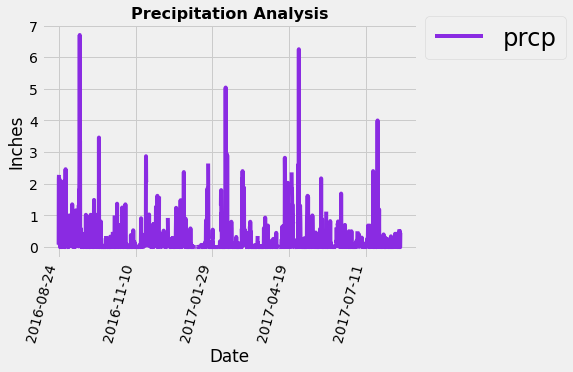

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent_date)

# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(one_year_ago)

# Perform a query to retrieve the data and precipitation scores
precip_data=prcp_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > one_year_ago).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_data_df = pd.DataFrame(prcp_data).set_index('date')
precip_data_df.head()

# Sort the dataframe by date
precip_data_df = precip_data_df.sort_values("date")
precip_data_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize = (18,16))
precip_data_df.plot(y = "prcp",color='blueviolet')
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation = "75", horizontalalignment = "right")
plt.legend(fontsize="xx-large",loc=(1.02,0),bbox_to_anchor=(1.02,0.85))
plt.title("Precipitation Analysis",fontweight = "bold", fontsize = 16)
plt.show()



In [23]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_data_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [30]:
# Design a query to calculate the total number stations in the dataset
station_number = session.query(distinct(Measurement.station)).count()
station_number

9

In [31]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [32]:
print(f"Most active station: {active_stations[0][0]}.")

Most active station: USC00519281.


In [34]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_temp = session.query(func.min(Measurement.tobs)).all()
max_temp = session.query(func.max(Measurement.tobs)).all()
avrg_temp = session.query(func.avg(Measurement.tobs)).all()

print(f"Lowest Temperature: {min_temp[0][0]}")
print(f"Highiest Temperature: {max_temp[0][0]}")
print(f"Average Temperature: {avrg_temp[0][0]}")
      

Lowest Temperature: 53.0
Highiest Temperature: 87.0
Average Temperature: 73.09795396419437


In [40]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active = session.query(Measurement.station, Station.name, func.count(Measurement.station)).\
filter(Measurement.station == Station.station).group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc()).first()

tempData = [Measurement.date, Measurement.tobs, Measurement.station]

temp_data = session.query(*tempData).\
   filter(Measurement.station=='USC00519281').\
    filter(Measurement.date <= recent_date).\
    filter(Measurement.date >= one_year_ago).all()
temp_data.head()

InterfaceError: (sqlite3.InterfaceError) Error binding parameter 1 - probably unsupported type.
[SQL: SELECT measurement.date AS measurement_date, measurement.tobs AS measurement_tobs, measurement.station AS measurement_station 
FROM measurement 
WHERE measurement.station = ? AND measurement.date <= ? AND measurement.date >= ?]
[parameters: ('USC00519281', ('2017-08-23',), '2016-08-23')]
(Background on this error at: http://sqlalche.me/e/13/rvf5)

# Close session

In [ ]:
# Close Session
session.close()